What are the top 5 education backgrounds for the data scientist (based on major discipline) Caroline L


What are some education characteristics for those candidates who are staying? Caroline L


Is it a fact that: the longer the candidate is being trained, the higher chance he/she will stay? How should we adjust the training hours as a HR? Caroline L (make buckets for training hours )

In [ ]:
pip install squarify 

In [ ]:
pip install circlify

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')

In [ ]:
df['size'] = np.where(df['company_size'].isin(['50-99',"10/49'",'<10']), "Small Company", "Unknown")
df['size'] = np.where(df['company_size'].isin(['100-500','500-999']), "Medium Company",df['size'])
df['size'] = np.where(df['company_size'].isin(['10000+','1000-4999','5000-9999']), "Large Company",df['size'])
sorted_counts=df['size'].value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  size                    19158 non-null

In [ ]:
df_Clean = df_Clean = df.dropna(subset = ['gender','enrolled_university','education_level','major_discipline','experience','last_new_job'])
df_Clean = df_Clean.fillna('Unknown')

In [ ]:
df_Clean["company_size"].replace({"10/49":"10-49"}, inplace=True)

In [ ]:
df_Clean.drop(["company_size"], axis=1, inplace=True)
df_Clean.rename(columns={"size": "company_size"}, inplace=True)

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df_Clean.company_size.unique()

array(['Unknown', 'Small Company', 'Large Company', 'Medium Company'],
      dtype=object)

What are the top 5 education backgrounds for the data scientist (based on major discipline) Caroline L

In [ ]:
df_Clean.education_level.unique()

array(['Graduate', 'Masters', 'Phd'], dtype=object)

In [ ]:
# import the circlify library
import circlify
values_e = df_Clean["education_level"].value_counts().sort_values(ascending=False)
labels_e = df_Clean["education_level"].value_counts().sort_values(ascending=True).index
# compute circle positions:
circles = circlify.circlify(
    values_e.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

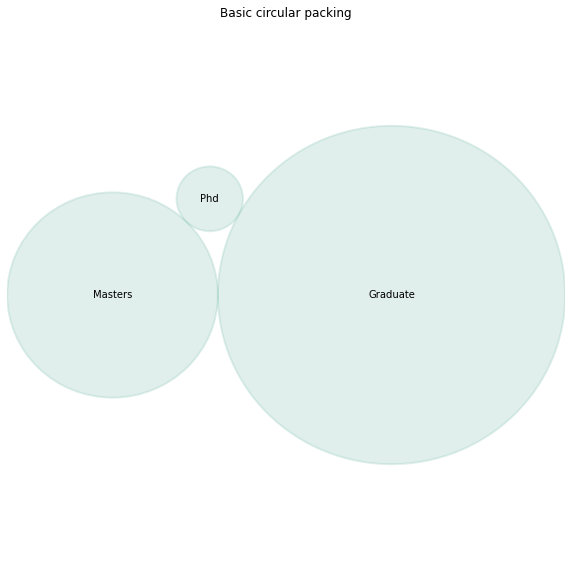

In [ ]:
# circular packing
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = labels_e

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, color="#69b3a2",linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )
# https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

The candidates mostly have undergraduate education background, and small portion of the candidates has Phd. 

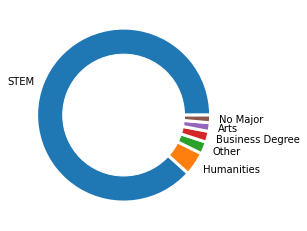

In [ ]:
# donut chart 
# create data
values_m = df_Clean["major_discipline"].value_counts()
labels_m = values_m.index
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(values_m, labels=labels_m, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Most of the enrollees major in STEM, which is reasonable because the company is hiring data scientists. 

##What are some education characteristics for those candidates who are staying? Caroline L

In [ ]:
df_education = df_Clean[["target","enrolled_university", "education_level", "major_discipline"]]

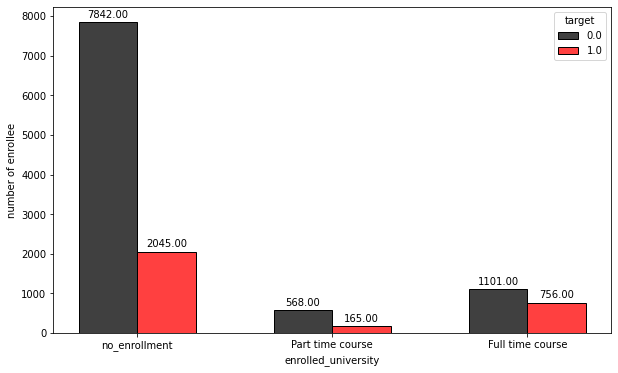

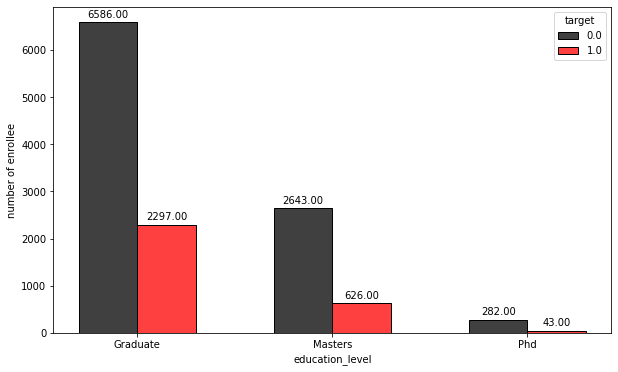

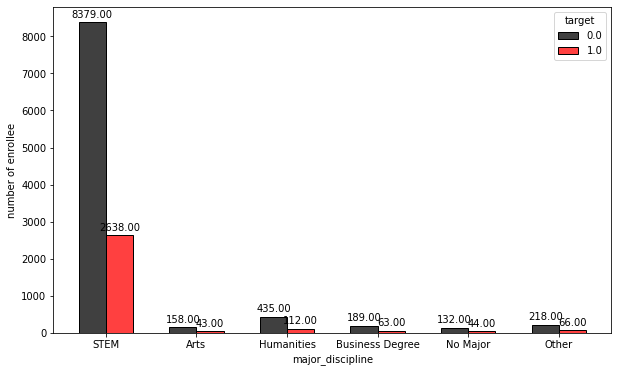

In [ ]:
for i in df_education.drop("target",axis=1):
  plt.figure(figsize=[10,6])
  hue_colors = {0:"black",1:"red"}   
  plots = sns.histplot(data = df_Clean,x=i,hue="target",palette=hue_colors, multiple="dodge", shrink = 0.6)
  # Iterrating over the bars one-by-one
  for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

  plt.xlabel(i)
  plt.ylabel("number of enrollee")
  plt.show()

Text(0, 0.5, 'number of candidates')

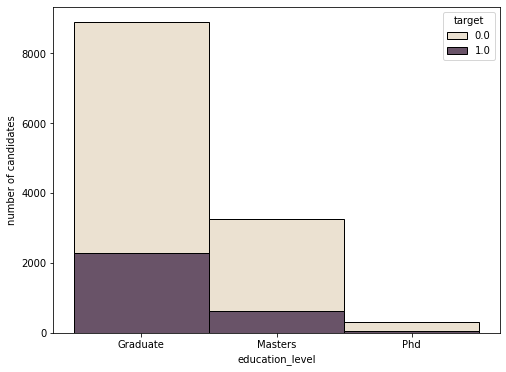

In [ ]:
%matplotlib inline
plt.figure(figsize=[8,6])
sns.histplot(binwidth=1, x="education_level", hue="target", data=df_Clean, palette="ch:.25", stat="count", multiple="stack")
plt.ylabel("number of candidates")

Master candidates who decide to stay have larger porption. 
Candidates who have no enrollment or enroll in part-time course tend to stay in the company. 
STEM majored candidates have higher chance to stay.

 



Is it a fact that: the longer the candidate is being trained, the higher chance he/she will stay? How should we adjust the training hours as a HR? Caroline L (make buckets for training hours )

In [ ]:
df_Clean["training_hours"]

0        36
1        47
4         8
7        18
8        46
         ..
19150    23
19152    25
19153    42
19154    52
19155    44
Name: training_hours, Length: 12477, dtype: int64

In [ ]:
df_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12477 entries, 0 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             12477 non-null  int64  
 1   city                    12477 non-null  object 
 2   city_development_index  12477 non-null  float64
 3   gender                  12477 non-null  object 
 4   relevent_experience     12477 non-null  object 
 5   enrolled_university     12477 non-null  object 
 6   education_level         12477 non-null  object 
 7   major_discipline        12477 non-null  object 
 8   experience              12477 non-null  object 
 9   company_type            12477 non-null  object 
 10  last_new_job            12477 non-null  object 
 11  training_hours          12477 non-null  int64  
 12  target                  12477 non-null  float64
 13  company_size            12477 non-null  object 
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(0,51)), "a).0-50", "Unknown")
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(51,101)), "b).50-100",df_Clean['training_hours_range'])
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(101,151)), "c).100-150",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(151,201)), "d).150-200",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(201,251)), "e).200-250",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(251,301)), "f).250-300",df_Clean['training_hours_range'] )
df_Clean['training_hours_range'] = np.where(df_Clean['training_hours'].isin(range(301,351)), "g).300-350",df_Clean['training_hours_range'] )
df_Clean=df_Clean.sort_values('training_hours_range', ascending=True)

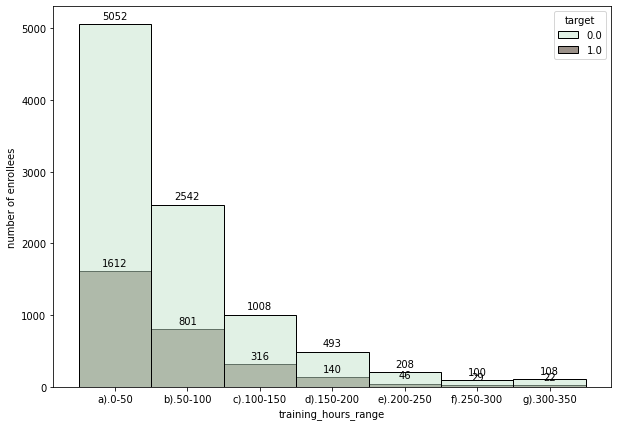

In [ ]:
# How much training hours does the company invest in its future employees? we can plot a histogram of training hours.)
plt.figure(figsize=[10,7])
plots_thrs = sns.histplot(data=df_Clean, x='training_hours_range', hue="target", palette="ch:10")

  # Iterrating over the bars one-by-one
for bar in plots_thrs.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots_thrs.annotate(format(bar.get_height(), 'd'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

plt.ylabel("number of enrollees")
plt.show()

Based on the hisplot for training hours, we can observe that it's not necessary that the more time the candidate is being trained, the higher chance he/she will stay. From a HR perspective, 50-150hrs training hour range has higher percentage of retention about 76%. It's the ideal range for the employees. 

100-150:76.1%
50-100: 76.04%

In [ ]:
bar.get_height

<bound method Rectangle.get_height of <matplotlib.patches.Rectangle object at 0x7f75d0e077d0>>

In [ ]:

df_Clean=df_Clean.sort_values('training_hours_range', ascending=True)
